**Analisis Sentimen pada Twitter tentang Pelanggaran Hukum dengan Naive Bayes, SVM, dan Random Forest**

In [1]:
import pandas as pd
!pip install Sastrawi
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = "/content/drive/MyDrive/MBKM/data.xlsx"
df = pd.read_excel(data)
df.head()

,Clean Text,Polaritas
0,KPK sudah lemah syahwatnya KPKImpotenKorupsiNg...,negatif
1,Maju terus KPK TegakkanHukum KPK RI UndangUndang,positif
2,Saya yakin KPK bukan orang yang bodoh yang tid...,negatif
3,KPK lemah koruptor tertawa bahagia Bukan tanpa...,negatif
4,Di tersangkakan oleh KPK bukan ya,netral


In [4]:
# INFO DATAFRAME
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14445 entries, 0 to 14444
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Clean Text  14445 non-null  object
 1   Polaritas   14445 non-null  object
dtypes: object(2)
memory usage: 225.8+ KB


In [5]:
print(df)

                                              Clean Text Polaritas
0      KPK sudah lemah syahwatnya KPKImpotenKorupsiNg...   negatif
1       Maju terus KPK TegakkanHukum KPK RI UndangUndang   positif
2      Saya yakin KPK bukan orang yang bodoh yang tid...   negatif
3      KPK lemah koruptor tertawa bahagia Bukan tanpa...   negatif
4                      Di tersangkakan oleh KPK bukan ya    netral
...                                                  ...       ...
14440  Saya kenal MAKI ICW BPK KPK Versi Lama hanya P...   positif
14441  Saya kenal MAKI ICW BPK KPK Versi Lama hanya P...   positif
14442  Era ThePowerOfNetizen sekarang ini bagus ini b...   positif
14443  Mereka diam2 membangun kerajaan Ayolah KPK usu...   positif
14444  Good job Tinggal nunggu hukuman ini Mantan pej...   positif

[14445 rows x 2 columns]


In [6]:
def preprocessing(text):
    # Menghapus username
    text = re.sub('@[^\s]+', '', text)
    # Menghapus URL
    text = re.sub(r'http\S+', '', text)
    # Menghapus angka dan tanda baca
    text = re.sub('[0-9%s]' % re.escape(string.punctuation), '', text)
    # Mengubah menjadi lowercase
    text = text.lower()
    # Tokenisasi menggunakan NLTK
    tokens = nltk.word_tokenize(text)
    words = [word for word in tokens]
    return ' '.join(words)

In [7]:
# Preprocessing
df['Clean Text'] = df['Clean Text'].apply(preprocessing)
df.head()

,Clean Text,Polaritas
0,kpk sudah lemah syahwatnya kpkimpotenkorupsing...,negatif
1,maju terus kpk tegakkanhukum kpk ri undangundang,positif
2,saya yakin kpk bukan orang yang bodoh yang tid...,negatif
3,kpk lemah koruptor tertawa bahagia bukan tanpa...,negatif
4,di tersangkakan oleh kpk bukan ya,netral


In [ ]:
# Checks if the dataframe has a null value.
# df.isnull().sum() to see a summary of null values.
df.isnull().sum()

Clean Text    0
Polaritas     0
dtype: int64

In [ ]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(df['Clean Text'], df['Polaritas'], test_size=0.3, random_state=0)

In [ ]:
# Buat TF-IDF Vectorizer
vectorizer = TfidfVectorizer(preprocessor=preprocessing)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
f = open('/content/drive/MyDrive/MBKM//my_vectorizer.pickle', 'wb')
pickle.dump(vectorizer, f)
f.close()

In [ ]:
# Import Naive Bayes classifier dan metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

**Naive Bayes Classifier**

In [ ]:
# Inisialisasi klasifikasi Naive Bayes
nb = MultinomialNB()

# Latih model Naive Bayes
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Lakukan prediksi sentimen pada data uji
y_pred = nb.predict(X_test_tfidf)

# Cetak laporan klasifikasi
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     negatif       0.66      0.98      0.79      2274
      netral       0.87      0.49      0.63      1372
     positif       0.92      0.21      0.35       688

    accuracy                           0.71      4334
   macro avg       0.81      0.56      0.59      4334
weighted avg       0.77      0.71      0.67      4334



In [ ]:
# Melakukan prediksi sentimen pada kalimat baru
new_text = "kpk sudah lemah syahwatnya"
new_text_preprocessed = preprocessing(new_text)
new_text_tfidf = vectorizer.transform([new_text_preprocessed])
prediction = nb.predict(new_text_tfidf)
print("Prediksi sentimen:", prediction)

Prediksi sentimen: ['negatif']


**Support Vector Machine**

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [ ]:
# Lakukan prediksi sentimen pada data uji
y_predsvm = svc.predict(X_test_tfidf)

# Cetak laporan klasifikasi
print(classification_report(y_test, y_predsvm))

              precision    recall  f1-score   support

     negatif       0.74      0.85      0.79      2274
      netral       0.70      0.63      0.67      1372
     positif       0.68      0.49      0.57       688

    accuracy                           0.72      4334
   macro avg       0.71      0.66      0.68      4334
weighted avg       0.72      0.72      0.72      4334



In [ ]:
# Melakukan prediksi sentimen pada kalimat baru
new_text = "di tersangkakan oleh kpk bukan ya"
new_text_preprocessed = preprocessing(new_text)
new_text_tfidf = vectorizer.transform([new_text_preprocessed])
prediction = svc.predict(new_text_tfidf)
print("Prediksi sentimen:", prediction)

Prediksi sentimen: ['netral']


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [ ]:
# Lakukan prediksi sentimen pada data uji
y_predrf = rf.predict(X_test_tfidf)

# Cetak laporan klasifikasi
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

     negatif       0.68      0.94      0.79      2274
      netral       0.81      0.54      0.65      1372
     positif       0.84      0.34      0.48       688

    accuracy                           0.72      4334
   macro avg       0.78      0.61      0.64      4334
weighted avg       0.75      0.72      0.70      4334



In [ ]:
# Melakukan prediksi sentimen pada kalimat baru
new_text = "maju terus kpk tegakkanhukum kpk ri"
new_text_preprocessed = preprocessing(new_text)
new_text_tfidf = vectorizer.transform([new_text_preprocessed])
prediction = rf.predict(new_text_tfidf)
print("Prediksi sentimen:", prediction)

Prediksi sentimen: ['positif']


In [ ]:
import tensorflow as tf

print("Versi TensorFlow:", tf.__version__)

Versi TensorFlow: 2.12.0


In [ ]:
import tensorflow.keras as keras

print("Versi Keras:", keras.__version__)


Versi Keras: 2.12.0


Visualisasi

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

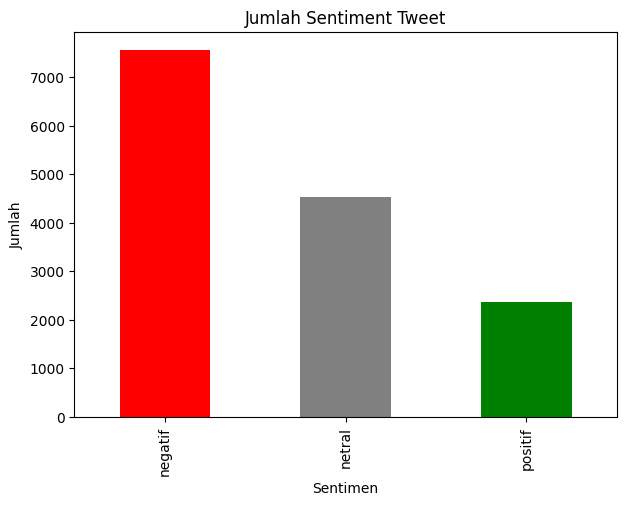

In [ ]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
color = ['red','grey','green']
df['Polaritas'].value_counts().plot(kind='bar',color = color)
plt.title('Jumlah Sentiment Tweet')
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of sentiment')

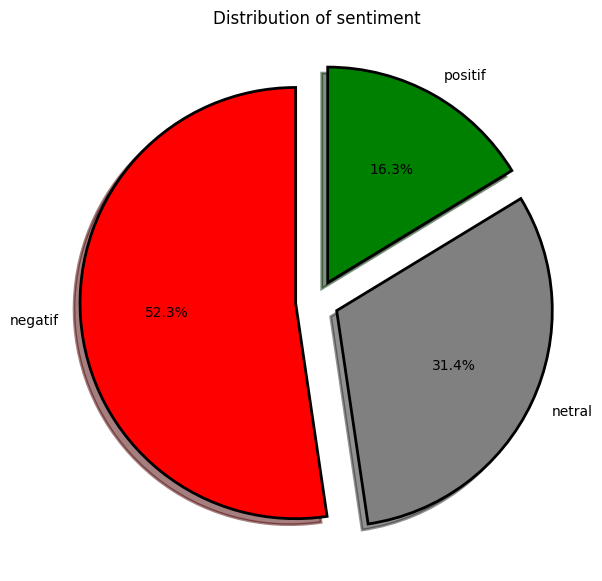

In [ ]:
# pie chart
fig = plt.figure(figsize=(7,7))
colors = ('red', 'grey', 'green')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df['Polaritas'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of sentiment')

**wordcloud**

In [ ]:
# Sentimen Positif
df_pos=df[df['Polaritas']=='positif']
all_words_lem = ' '.join([word for word in df_pos['Clean Text']])

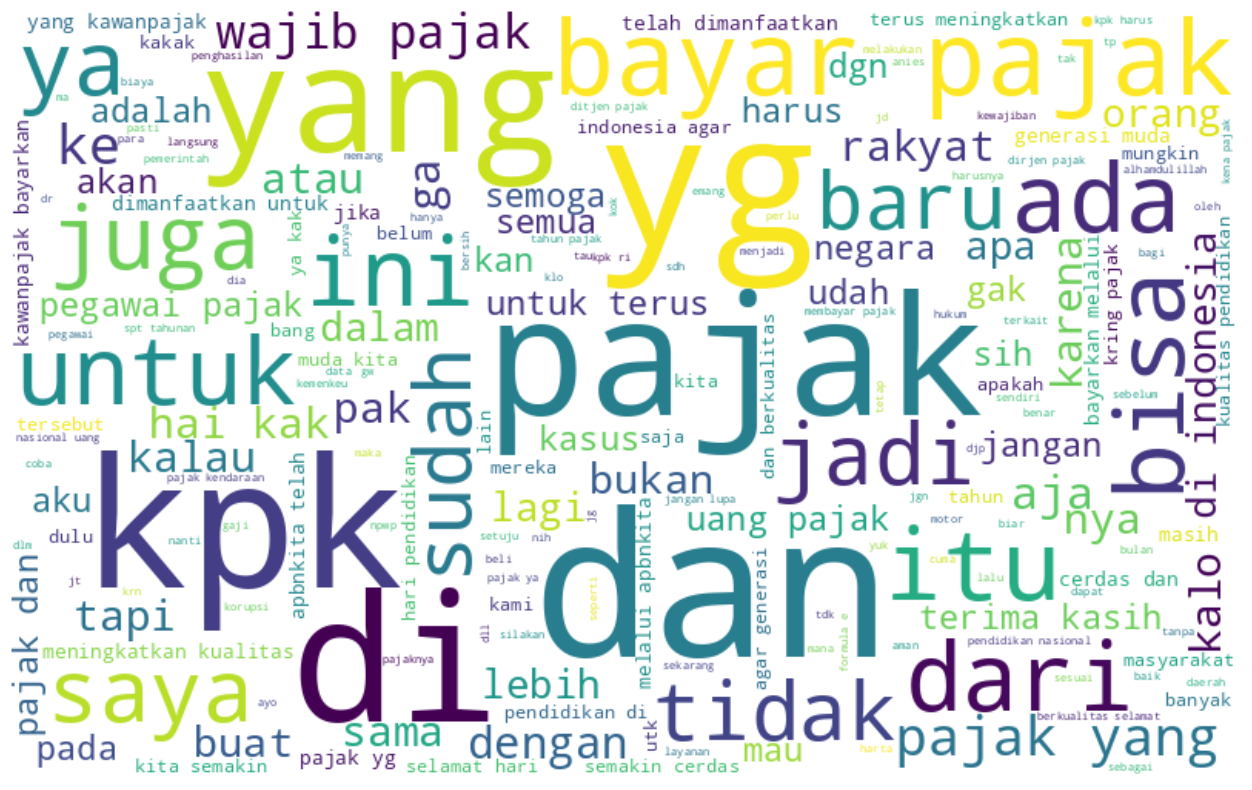

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
# Sentimen Negatif
df_pos=df[df['Polaritas']=='negatif']
all_words_lem = ' '.join([word for word in df_pos['Clean Text']])

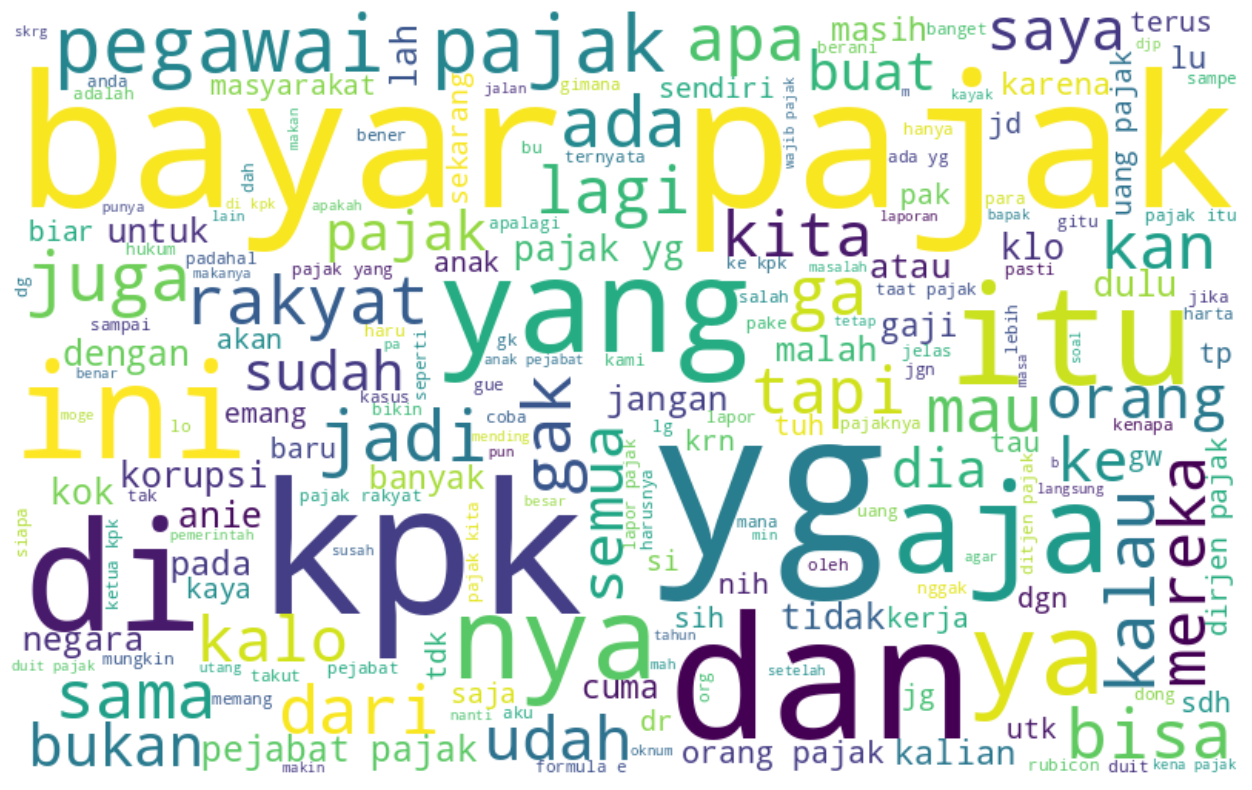

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
# Sentimen Netral
df_pos=df[df['Polaritas']=='netral']
all_words_lem = ' '.join([word for word in df_pos['Clean Text']])

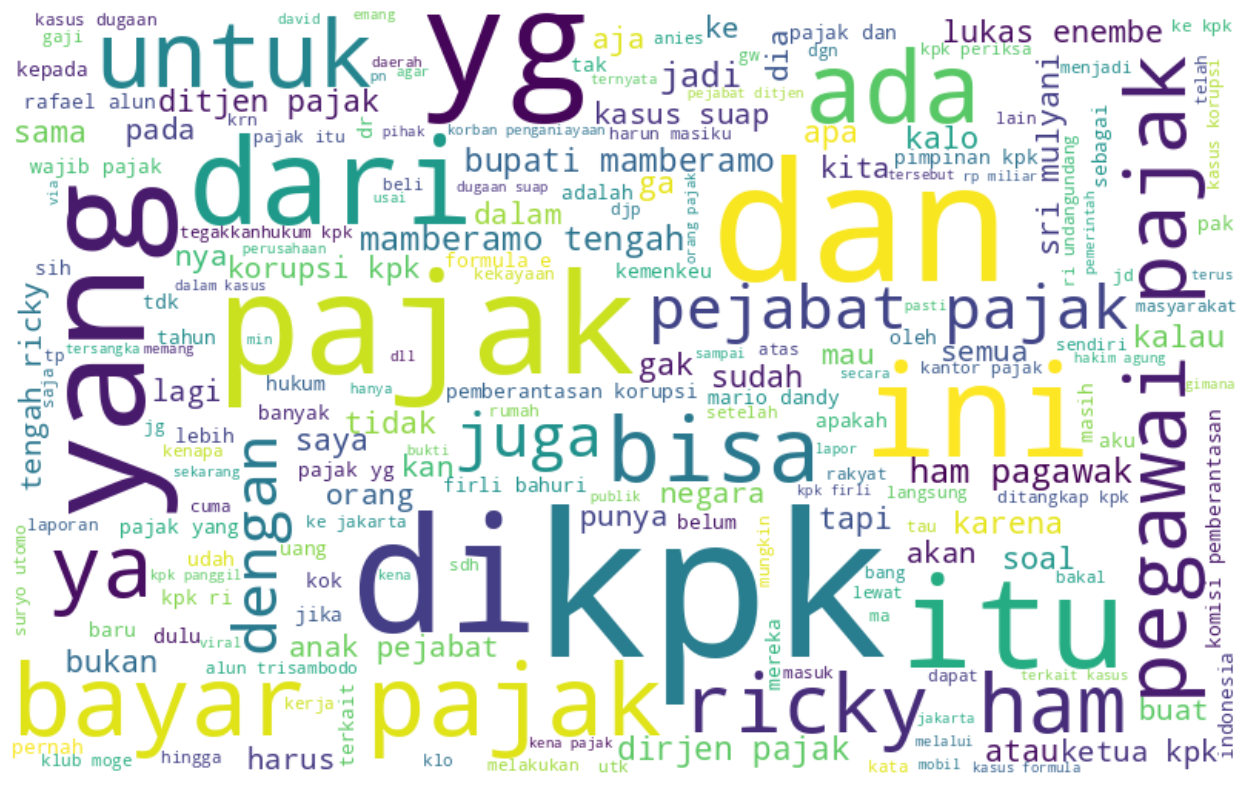

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');